In [136]:
# import packages

from numpy import vander, transpose, invert, array, linspace, sum, zeros, abs
from numpy.linalg import inv
import matplotlib.pyplot as plt
from random import uniform

In [149]:
# define target function
def h_theta(theta: array, x: array):
    return transpose(theta) @ x
    
# define function that calculates the polynomial coefficients and the squared-error using the normal equations
def polynomialRegression(x_coordinates: array, y_coordinates: array, degree: int) -> array :
    alpha = 0.01
    theta = zeros(degree+1)
    error = 0
    
    X = vander(x_coordinates, degree+1, increasing=True)
    y = y_coordinates
    m = len(y)
    i = 0
    
    while True:
        theta_temp = theta
        error_temp = error
        
        for j in range(degree+1):
            theta[j] = theta_temp[j] + alpha/m * sum([(y[i]-h_theta(theta_temp ,X[i]))*X[i][j] for i in range(m)])
    
        error = 1/(2*x_coordinates.size) * sum(((X @ theta) - y_coordinates)**2)
        
        if (abs(error)<4) or (i > 1000):
            print(i)
            return theta, error
        
        i+=1
            
    return theta, error

In [150]:
# number of training samples
N = 400

# random generation of training samples
x_coord = array([uniform(0,10) for _ in range(N)])
y_coord = array([uniform(0,10) for _ in range(N)])

1001
1001


/Users/jacobleooskarhunecke/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/kn/dp5x0lt128q8hw9063nv6d2m0000gn/T/ipykernel_39462/3314797055.py:23: RuntimeWarning: overflow encountered in square
  error = 1/(2*x_coordinates.size) * sum(((X @ theta) - y_coordinates)**2)
/var/folders/kn/dp5x0lt128q8hw9063nv6d2m0000gn/T/ipykernel_39462/3314797055.py:21: RuntimeWarning: invalid value encountered in double_scalars
  theta[j] = theta_temp[j] + alpha/m * sum([(y[i]-h_theta(theta_temp ,X[i]))*X[i][j] for i in range(m)])


1001


/var/folders/kn/dp5x0lt128q8hw9063nv6d2m0000gn/T/ipykernel_39462/3314797055.py:23: RuntimeWarning: overflow encountered in square
  error = 1/(2*x_coordinates.size) * sum(((X @ theta) - y_coordinates)**2)
/Users/jacobleooskarhunecke/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/kn/dp5x0lt128q8hw9063nv6d2m0000gn/T/ipykernel_39462/3314797055.py:21: RuntimeWarning: invalid value encountered in double_scalars
  theta[j] = theta_temp[j] + alpha/m * sum([(y[i]-h_theta(theta_temp ,X[i]))*X[i][j] for i in range(m)])


1001


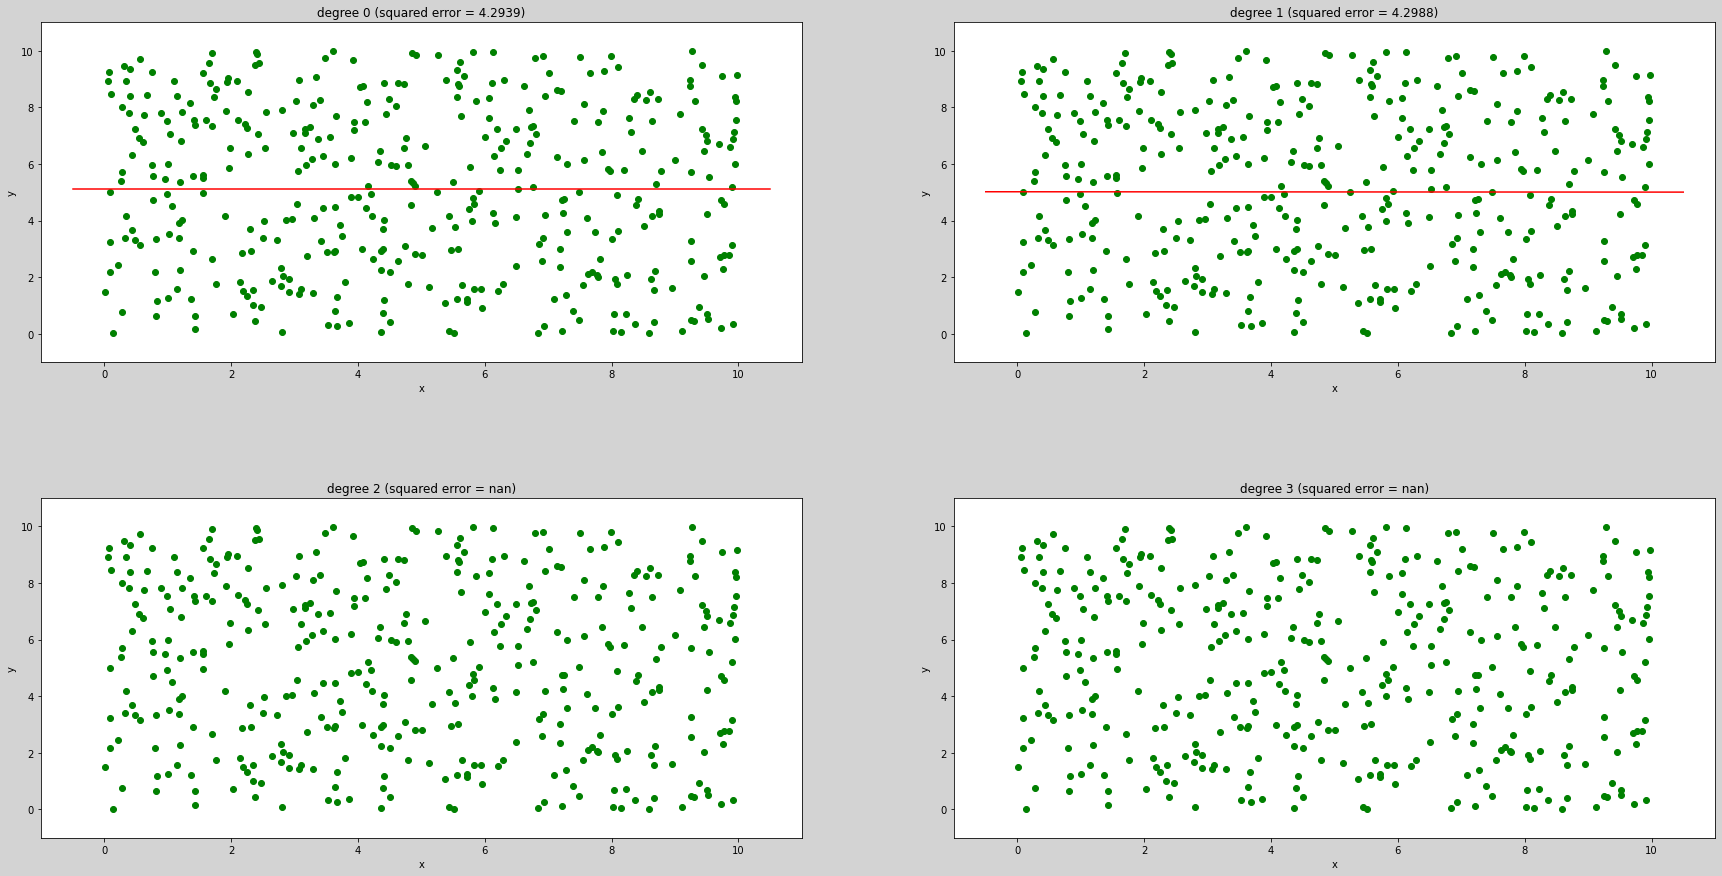

In [151]:
w = 2
h = 2

fig = plt.figure(figsize=(30,15), facecolor='lightgrey')

for i in range(w*h):
    degree = i
    beta, error = polynomialRegression(x_coord, y_coord, degree)
    x = linspace(-0.5,10.5, 100)
    y = vander(x, degree+1, increasing=True) @ beta
    
    plt.subplot(w,h,i+1)
    plt.title(f"degree {degree} (squared error = {round(error,4)})")
    plt.xlim(-1,11)
    plt.ylim(-1,11)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(x_coord, y_coord, color="green")
    plt.plot(x, y, color="red")

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()